In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
stop_words=set(stopwords.words("english"))
from wordcloud import WordCloud

In [2]:
df=pd.read_excel(r"C:\Users\aryan\Downloads\Imdb.xlsx")

In [3]:
df.shape

(50000, 2)

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Text(0.5, 1.0, 'Sentiment data distribution')

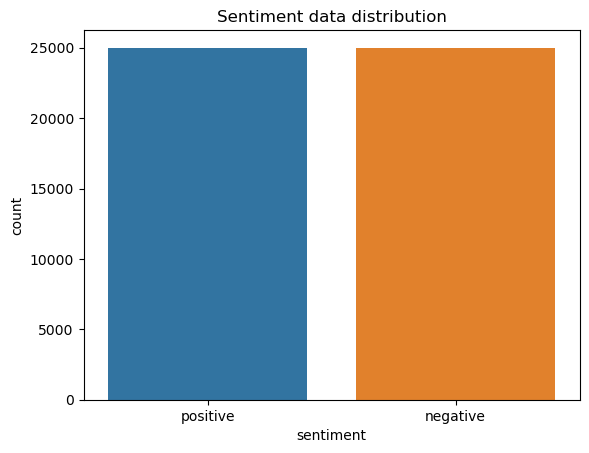

In [6]:
sns.countplot(x="sentiment",data=df)
plt.title("Sentiment data distribution")

In [7]:
for i in range(5):
    print(df["review"].iloc[i],"\n")
    print(df["sentiment"].iloc[i],"\n")

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [8]:
def no_of_words(text):
    words=text.split()
    wor_count=len(words)
    return wor_count

In [9]:
df["word_count"]=df["review"].apply(no_of_words)

In [10]:
df.head()

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


In [11]:
df["sentiment"].replace("positive",0,inplace=True)

In [12]:
df["sentiment"].replace("negative",1,inplace=True)

In [13]:
df.head()

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,0,307
1,A wonderful little production. <br /><br />The...,0,162
2,I thought this was a wonderful way to spend ti...,0,166
3,Basically there's a family where a little boy ...,1,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",0,230


In [14]:
def data_processing(text):
    text=text.lower()
    text = re.sub(r"<br\s*/?>", " ", text) 
    text=re.sub(r"https\S+|www\S+|http\S+","",text)
    text=re.sub(r"@w+|/#","",text)
    text=re.sub(r"[^\w\s]"," ",text)
    tokens = word_tokenize(text)
    filtered_tokens=(w for w in tokens if w not in stop_words)
    return " ".join(filtered_tokens)


In [ ]:
df["review"]=df["review"].apply(data_processing)

In [ ]:
df.duplicated().sum()

In [ ]:
df=df.drop_duplicates("review")

In [ ]:
df.duplicated().sum()

In [ ]:
stemmer=PorterStemmer()
def stemming(data):
    text=[stemmer.stem(word) for word in data]
    return data

In [ ]:
df.review =df["review"].apply(lambda x: stemming (x))

In [ ]:
df["word_count"]=df["review"].apply(no_of_words)

In [ ]:
df.head()

In [ ]:
pos_re = df[df.sentiment==0]
pos_re.head()

In [ ]:
neg_re = df[df.sentiment==1]
neg_re.head()

In [ ]:
from collections import Counter
count=Counter()

In [ ]:
for text in pos_re["review"].values:
    for word in text.split():
        count[word] += 1
    

In [ ]:
pos_words=pd.DataFrame(count.most_common(15))
pos_words.columns = ["words","count"]

In [ ]:
sns.barplot(x="words",y="count",data=pos_words)
plt.title("Positive Word Frequencies")
plt.xlabel("Words")
plt.ylabel("Count")
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [ ]:
for text in neg_re["review"].values:
    for word in text.split():
        count[word] += 1

In [ ]:
neg_words=pd.DataFrame(count.most_common(15))
neg_words.columns = ["words","count"]

In [ ]:
sns.barplot(x="words",y="count",data=neg_words)
plt.title("Positive Word Frequencies")
plt.xlabel("Words")
plt.ylabel("Count")
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [ ]:
x=df["review"]
y=df["sentiment"]

In [ ]:
vect=TfidfVectorizer()

In [ ]:
x=vect.fit_transform(df["review"])

In [ ]:
x_train, x_test, y_train, y_split = train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [ ]:
modelLR=LogisticRegression()
modelLR.fit(x_train,y_train)
y_predLR=modelLR.predict(x_test)
LRacc=accuracy_score(y_predLR,y_split)
LRacc

In [ ]:
print(confusion_matrix(y_split,y_predLR))
print(classification_report(y_split,y_predLR))

In [ ]:
modelNB=MultinomialNB()
modelNB.fit(x_train,y_train)
y_predNB=modelNB.predict(x_test)
NBacc=accuracy_score(y_predNB,y_split)
NBacc

In [ ]:
print(confusion_matrix(y_split,y_predNB))
print(classification_report(y_split,y_predNB))

In [ ]:
modelSVC=LinearSVC()
modelSVC.fit(x_train,y_train)
y_predSVC=modelSVC.predict(x_test)
SVCacc=accuracy_score(y_predSVC,y_split)
SVCacc

In [ ]:
print(confusion_matrix(y_split,y_predSVC))
print(classification_report(y_split,y_predSVC))

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'loss': ['hinge', 'squared_hinge']
}
grid = GridSearchCV(LinearSVC(), param_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)


In [ ]:
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

In [ ]:
modelSVC=LinearSVC(C=1, loss = "hinge")
modelSVC.fit(x_train,y_train)
y_predSVC=modelSVC.predict(x_test)
SVCacc=accuracy_score(y_predSVC,y_split)
SVCacc

In [ ]:
print(confusion_matrix(y_split,y_predSVC))
print(classification_report(y_split,y_predSVC))

In [ ]:
new_review = input("Enter Movie Review: ")
processed_review = data_processing(new_review)
new_review_vector = vect.transform([processed_review])
prediction = modelSVC.predict(new_review_vector)
if prediction == 0:
    print("Positive")
else:
    print("negative")
